In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
df = pd.read_csv("/content/Physical_Activity_Monitoring_unlabeled.csv")
df

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.33360,-5.766200,0.206416,0.348212,0.763201,-0.503652,5.0
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.77190,-1.313950,0.578332,-0.566734,0.405888,-0.423791,2.0
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.30890,25.292800,0.139776,0.676586,0.393796,0.606316,8.0
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.35660,21.327400,0.416303,0.783387,0.306464,0.345075,2.0
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.99810,10.995000,0.171133,-0.748343,0.252988,-0.588807,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106542,3145.31,28.8125,-5.765620,6.64561,11.054200,-7.551330,8.48191,14.706200,-1.891320,-1.442510,...,0.547638,-2.339460,-14.5348,-19.64910,-2.449520,0.593778,-0.617017,0.515988,0.021784,6.0
106543,3044.37,30.6250,1.496280,6.04997,6.007640,-0.010668,3.75066,3.775860,0.782622,-0.326505,...,0.255428,-0.112790,-34.0827,8.28240,14.043700,0.361391,0.584087,0.542945,0.483166,8.0
106544,3460.77,33.8125,-8.048870,-5.23642,-0.062807,-7.251440,-5.98672,0.195513,-0.036834,0.150425,...,-0.655229,-4.936860,-33.0441,-17.81650,0.319882,0.400333,-0.100371,0.838803,0.355063,5.0
106545,3020.02,28.8750,-6.926920,7.14099,14.499000,-4.598810,5.33215,12.278800,-0.957693,-0.712279,...,-0.109266,-1.309290,-45.5923,8.49862,23.647500,0.166718,0.599890,0.463520,0.630466,4.0


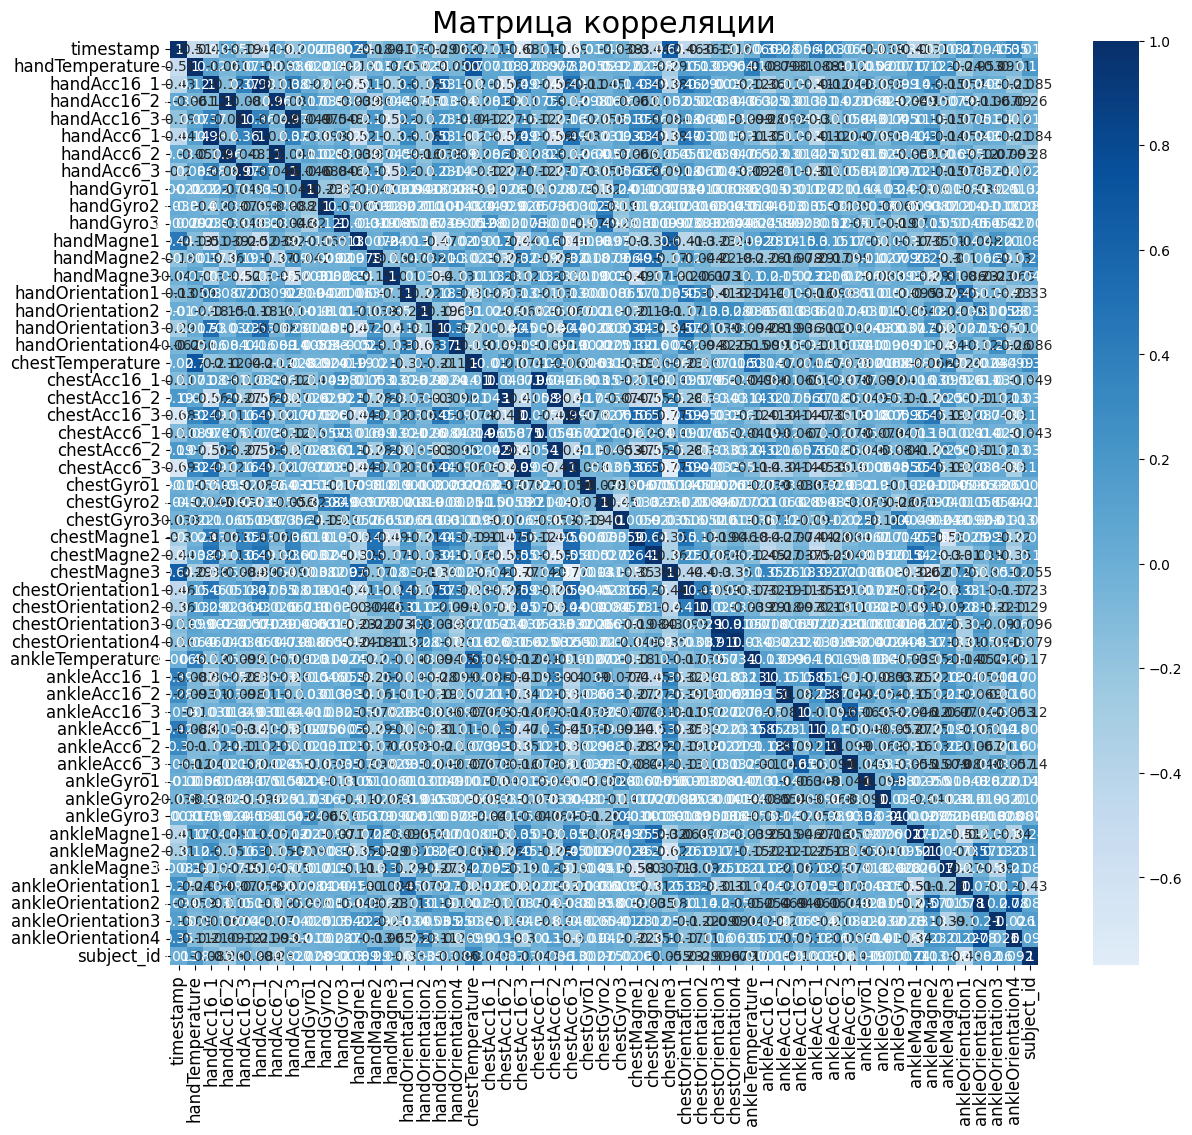

In [2]:
plt.figure(figsize=(14,12))
a = df.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Blues', center=0, annot=True)
plt.title("Матрица корреляции", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [3]:
df.isna().sum()

,0
timestamp,0
handTemperature,818
handAcc16_1,818
handAcc16_2,818
handAcc16_3,818
handAcc6_1,818
handAcc6_2,818
handAcc6_3,818
handGyro1,818
handGyro2,818


In [4]:
for i in df.columns:
  df[i].fillna(df[i].mean(), inplace=True)
df.isna().sum()

<ipython-input-4-83404e097b94>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


,0
timestamp,0
handTemperature,0
handAcc16_1,0
handAcc16_2,0
handAcc16_3,0
handAcc6_1,0
handAcc6_2,0
handAcc6_3,0
handGyro1,0
handGyro2,0


=================================================================================================================

In [5]:
std = StandardScaler()

X_std = std.fit_transform(df) # type - numpy array

X_std = pd.DataFrame(X_std, columns=df.columns)
X_std

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,-1.080680,1.386464,0.759044,0.586044,0.508554,0.765321,0.619105,0.531823,-0.012989,-0.026110,...,0.012372,0.015024,0.738018,1.140057,-1.151853,-0.511175,0.787844,1.338147e+00,-7.089375e-01,0.188189
1,1.655794,-1.540366,0.053169,0.071580,1.093204,-0.224820,0.000708,0.689415,0.105765,-0.438313,...,-1.031481,0.877999,-0.214469,-0.804563,-0.902281,0.730535,-0.849744,2.983384e-01,-5.373474e-01,-1.109793
2,-0.877833,1.100919,0.345871,-1.788024,-0.859604,0.366688,-1.875428,-0.829776,0.023223,0.015183,...,0.038066,-0.003071,0.515415,0.642699,0.589170,-0.733665,1.375575,2.631497e-01,1.675950e+00,1.486171
3,0.970939,-0.291110,-1.251896,0.362798,-0.826912,-1.308662,0.394966,-0.890515,1.482206,-0.085330,...,-0.210897,-1.717751,0.102518,1.456886,0.366888,0.189571,1.566729,9.006725e-03,1.114645e+00,-1.109793
4,-0.929146,0.601217,0.628892,0.753961,0.083372,0.643026,0.783465,0.146134,-0.000070,-0.038578,...,0.008216,-0.001674,0.569461,-0.273411,-0.212298,-0.628974,-1.174791,-1.466126e-01,-8.919023e-01,0.620850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106542,1.247588,-2.075762,-0.187645,0.472896,1.815026,-0.448829,0.770835,2.719389,-1.621588,-1.594990,...,0.940735,-1.149576,0.738534,-0.979475,-0.965936,0.782104,-0.939741,6.187380e-01,4.200201e-01,0.620850
106543,1.166340,-1.040664,0.843291,0.390009,0.502089,0.621060,0.078015,-0.126276,0.679349,-0.384670,...,0.467504,-0.055268,-0.279962,0.280600,-0.041402,0.006237,1.210018,6.971850e-01,1.411349e+00,1.486171
106544,1.501507,0.779682,-0.511786,-1.180556,-1.077227,-0.406280,-1.347875,-1.058403,-0.025796,0.132566,...,-1.007296,-2.426080,-0.225849,-0.896801,-0.810696,0.136252,-0.015038,1.558155e+00,1.136106e+00,0.188189
106545,1.146740,-2.040069,-0.352508,0.541830,2.711241,-0.029918,0.309600,2.087426,-0.818198,-0.803046,...,-0.123114,-0.643294,-0.879642,0.290354,0.496942,-0.643715,1.238303,4.660520e-01,1.727839e+00,-0.244472


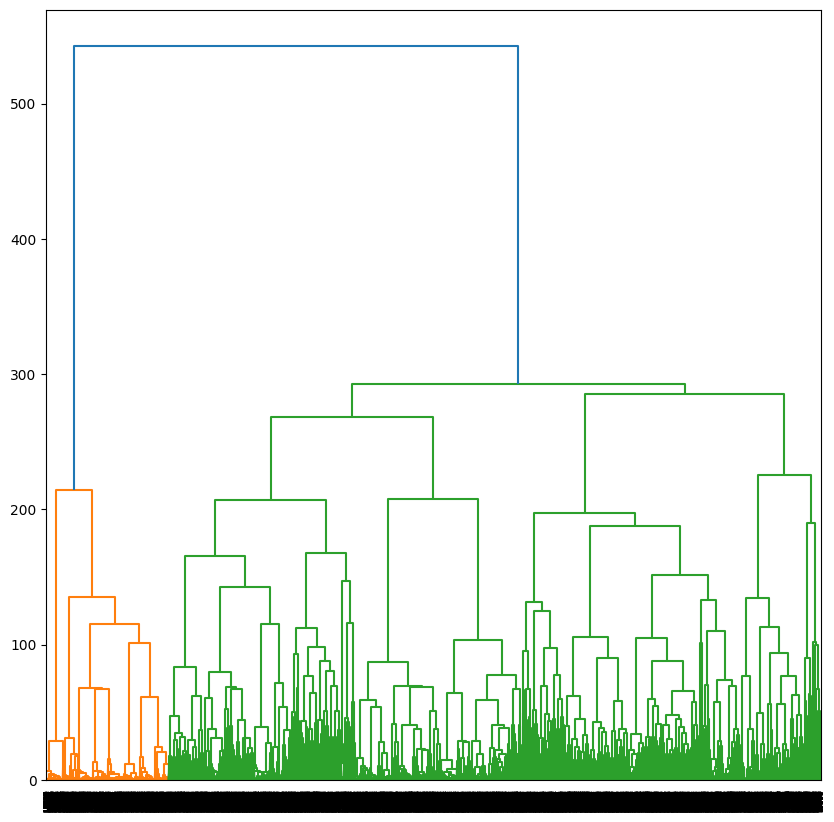

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# матрица расстояний
Z = linkage(X_std.iloc[:20000], 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [7]:
from sklearn.cluster import KMeans

# Создаем модель кластеризации
kmeans = KMeans(n_clusters=5)

# обучим нашу модель
kmeans.fit(X_std)
# kmeans.predict(X_new)

# выведем полученные метки кластеров, которые вычислил алгоритм
# Setosa - 0, Versicolour – 1 и Virginica – 2
Y_pred = kmeans.labels_
Y_pred

array([2, 1, 0, ..., 0, 0, 2], dtype=int32)

In [ ]:
otv = pd.DataFrame()
otv["Index"] = range(1,len(Y_pred) + 1)
otv["activityID"] = Y_pred
otv

,Index,activityID
0,1,3
1,2,0
2,3,4
3,4,4
4,5,2
...,...,...
534596,534597,1
534597,534598,4
534598,534599,4
534599,534600,1


In [ ]:
for i in range(len(Y_pred)):
  if (otv["activityID"][i] == 3):
    otv["activityID"][i] = 1
    continue;
  if (otv["activityID"][i] == 0):
    otv["activityID"][i] = 2
    continue;
  if (otv["activityID"][i] == 4):
    otv["activityID"][i] = 3
    continue;
  if (otv["activityID"][i] == 2):
    otv["activityID"][i] = 4
    continue;
  if (otv["activityID"][i] == 1):
    otv["activityID"][i] = 5
    continue;
otv

Выходные данные были обрезаны до нескольких последних строк (5000).
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  otv["activityID"][i] = 3
<ipython-input-37-5ce8d1a2be2e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otv["activityID"][i] = 3
<ipython-input-37-5ce8d1a2be2e>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are 

,Index,activityID
0,1,1
1,2,2
2,3,3
3,4,3
4,5,4
...,...,...
534596,534597,5
534597,534598,3
534598,534599,3
534599,534600,5


In [ ]:

otv.to_csv('output.csv', index=False)


==================================================================================

timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,handOrientation4,chestTemperature,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,chestOrientation1,chestOrientation2,chestOrientation3,chestOrientation4,ankleTemperature,ankleAcc16_1,ankleAcc16_2,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id

In [8]:
df["handAcc16"] = (df["handAcc16_1"] * df["handAcc16_1"] + df["handAcc16_2"] * df["handAcc16_2"] + df["handAcc16_3"] * df["handAcc16_3"]) ** 0.5
df = df.drop("handAcc16_1", axis=1)
df = df.drop("handAcc16_2", axis=1)
df = df.drop("handAcc16_3", axis=1)
df

,timestamp,handTemperature,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,...,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id,handAcc16
0,252.75,34.8750,1.006100,7.44575,6.303650,-0.021952,0.004114,-0.000752,-9.99538,7.229100,...,0.030239,-14.5447,27.33360,-5.766200,0.206416,0.348212,0.763201,-0.503652,5.000000,9.635277
1,3652.45,29.7500,-5.972500,3.22273,6.908970,0.116054,-0.375968,-0.012890,40.45580,-1.196920,...,1.786200,-32.8257,-15.77190,-1.313950,0.578332,-0.566734,0.405888,-0.423791,2.000000,9.963104
2,504.76,34.3750,-1.803500,-9.58937,1.073680,0.020131,0.042189,-0.011507,7.26741,24.437900,...,-0.006579,-18.8171,16.30890,25.292800,0.139776,0.676586,0.393796,0.606316,8.000000,9.839886
3,2801.61,31.9375,-13.611500,5.91511,0.840377,1.715630,-0.050492,-1.829000,46.48220,-7.839160,...,-3.495570,-26.7418,34.35660,21.327400,0.416303,0.783387,0.306464,0.345075,2.000000,14.524775
4,441.01,33.5000,0.144153,8.56816,4.822200,-0.006938,-0.007383,-0.032679,3.97764,-22.423200,...,-0.003737,-17.7798,-3.99810,10.995000,0.171133,-0.748343,0.252988,-0.588807,6.000000,9.717695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106542,3145.31,28.8125,-7.551330,8.48191,14.706200,-1.891320,-1.442510,-0.372681,29.06330,16.195900,...,-2.339460,-14.5348,-19.64910,-2.449520,0.593778,-0.617017,0.515988,0.021784,6.000000,14.128052
106543,3044.37,30.6250,-0.010668,3.75066,3.775860,0.782622,-0.326505,-0.670230,38.96510,-1.341600,...,-0.112790,-34.0827,8.28240,14.043700,0.361391,0.584087,0.542945,0.483166,8.000000,8.656369
106544,3460.77,33.8125,-7.251440,-5.98672,0.195513,-0.036834,0.150425,-2.482130,3.90616,-1.960260,...,-4.936860,-33.0441,-17.81650,0.319882,0.400333,-0.100371,0.838803,0.355063,5.000000,9.602518
106545,3020.02,28.8750,-4.598810,5.33215,12.278800,-0.957693,-0.712279,-0.627702,17.47300,-8.025770,...,-1.309290,-45.5923,8.49862,23.647500,0.166718,0.599890,0.463520,0.630466,4.000000,17.583997


In [9]:
df["handAcc6"] = (df["handAcc6_1"] * df["handAcc6_1"] + df["handAcc6_2"] * df["handAcc6_2"] + df["handAcc6_3"] * df["handAcc6_3"]) ** 0.5
df = df.drop("handAcc6_1", axis=1)
df = df.drop("handAcc6_2", axis=1)
df = df.drop("handAcc6_3", axis=1)
df

,timestamp,handTemperature,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,...,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id,handAcc16,handAcc6
0,252.75,34.8750,-0.021952,0.004114,-0.000752,-9.99538,7.229100,-32.1399,0.561813,-0.218644,...,-14.5447,27.33360,-5.766200,0.206416,0.348212,0.763201,-0.503652,5.000000,9.635277,9.807519
1,3652.45,29.7500,0.116054,-0.375968,-0.012890,40.45580,-1.196920,-37.5552,0.884964,-0.281047,...,-32.8257,-15.77190,-1.313950,0.578332,-0.566734,0.405888,-0.423791,2.000000,9.963104,9.684555
2,504.76,34.3750,0.020131,0.042189,-0.011507,7.26741,24.437900,-14.3005,0.535655,0.564385,...,-18.8171,16.30890,25.292800,0.139776,0.676586,0.393796,0.606316,8.000000,9.839886,9.816385
3,2801.61,31.9375,1.715630,-0.050492,-1.829000,46.48220,-7.839160,-13.6242,0.648205,0.540984,...,-26.7418,34.35660,21.327400,0.416303,0.783387,0.306464,0.345075,2.000000,14.524775,14.864982
4,441.01,33.5000,-0.006938,-0.007383,-0.032679,3.97764,-22.423200,-20.1775,0.769041,-0.442364,...,-17.7798,-3.99810,10.995000,0.171133,-0.748343,0.252988,-0.588807,6.000000,9.717695,9.832993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106542,3145.31,28.8125,-1.891320,-1.442510,-0.372681,29.06330,16.195900,-21.6436,0.784970,-0.299645,...,-14.5348,-19.64910,-2.449520,0.593778,-0.617017,0.515988,0.021784,6.000000,14.128052,18.580573
106543,3044.37,30.6250,0.782622,-0.326505,-0.670230,38.96510,-1.341600,-32.9745,0.930098,-0.102993,...,-34.0827,8.28240,14.043700,0.361391,0.584087,0.542945,0.483166,8.000000,8.656369,5.322094
106544,3460.77,33.8125,-0.036834,0.150425,-2.482130,3.90616,-1.960260,-44.9731,0.136502,0.524210,...,-33.0441,-17.81650,0.319882,0.400333,-0.100371,0.838803,0.355063,5.000000,9.602518,9.405446
106545,3020.02,28.8750,-0.957693,-0.712279,-0.627702,17.47300,-8.025770,-52.5752,0.118234,0.268936,...,-45.5923,8.49862,23.647500,0.166718,0.599890,0.463520,0.630466,4.000000,17.583997,14.154498


In [10]:
df["handGyro"] = (df["handGyro1"] * df["handGyro1"] + df["handGyro2"] * df["handGyro2"] + df["handGyro3"] * df["handGyro3"]) ** 0.5
df = df.drop("handGyro1", axis=1)
df = df.drop("handGyro2", axis=1)
df = df.drop("handGyro3", axis=1)

df["handMagne"] = (df["handMagne1"] * df["handMagne1"] + df["handMagne2"] * df["handMagne2"] + df["handMagne3"] * df["handMagne3"]) ** 0.5
df = df.drop("handMagne1", axis=1)
df = df.drop("handMagne2", axis=1)
df = df.drop("handMagne3", axis=1)

df["handOrientation"] = (df["handOrientation1"] * df["handOrientation1"] + df["handOrientation2"] * df["handOrientation2"] + df["handOrientation3"] * df["handOrientation3"]) ** 0.5
df = df.drop("handOrientation1", axis=1)
df = df.drop("handOrientation2", axis=1)
df = df.drop("handOrientation3", axis=1)

df["chestAcc16"] = (df["chestAcc16_1"] * df["chestAcc16_1"] + df["chestAcc16_2"] * df["chestAcc16_2"] + df["chestAcc16_3"] * df["chestAcc16_3"]) ** 0.5
df = df.drop("chestAcc16_1", axis=1)
df = df.drop("chestAcc16_2", axis=1)
df = df.drop("chestAcc16_3", axis=1)

df["chestAcc6"] = (df["chestAcc6_1"] * df["chestAcc6_1"] + df["chestAcc6_2"] * df["chestAcc6_2"] + df["chestAcc6_3"] * df["chestAcc6_3"]) ** 0.5
df = df.drop("chestAcc6_1", axis=1)
df = df.drop("chestAcc6_2", axis=1)
df = df.drop("chestAcc6_3", axis=1)

df["chestGyro"] = (df["chestGyro1"] * df["chestGyro1"] + df["chestGyro2"] * df["chestGyro2"] + df["chestGyro3"] * df["chestGyro3"]) ** 0.5
df = df.drop("chestGyro1", axis=1)
df = df.drop("chestGyro2", axis=1)
df = df.drop("chestGyro3", axis=1)

df["chestMagne"] = (df["chestMagne1"] * df["chestMagne1"] + df["chestMagne2"] * df["chestMagne2"] + df["chestMagne3"] * df["chestMagne3"]) ** 0.5
df = df.drop("chestMagne1", axis=1)
df = df.drop("chestMagne2", axis=1)
df = df.drop("chestMagne3", axis=1)

df["chestOrientation"] = (df["chestOrientation1"] * df["chestOrientation1"] + df["chestOrientation2"] * df["chestOrientation2"] + df["chestOrientation3"] * df["chestOrientation3"]) ** 0.5
df = df.drop("chestOrientation1", axis=1)
df = df.drop("chestOrientation2", axis=1)
df = df.drop("chestOrientation3", axis=1)

df["ankleAcc16"] = (df["ankleAcc16_1"] * df["ankleAcc16_1"] + df["ankleAcc16_2"] * df["ankleAcc16_2"] + df["ankleAcc16_3"] * df["ankleAcc16_3"]) ** 0.5
df = df.drop("ankleAcc16_1", axis=1)
df = df.drop("ankleAcc16_2", axis=1)
df = df.drop("ankleAcc16_3", axis=1)

df["ankleAcc6"] = (df["ankleAcc6_1"] * df["ankleAcc6_1"] + df["ankleAcc6_2"] * df["ankleAcc6_2"] + df["ankleAcc6_3"] * df["ankleAcc6_3"]) ** 0.5
df = df.drop("ankleAcc6_1", axis=1)
df = df.drop("ankleAcc6_2", axis=1)
df = df.drop("ankleAcc6_3", axis=1)

df["ankleGyro"] = (df["ankleGyro1"] * df["ankleGyro1"] + df["ankleGyro2"] * df["ankleGyro2"] + df["ankleGyro3"] * df["ankleGyro3"]) ** 0.5
df = df.drop("ankleGyro1", axis=1)
df = df.drop("ankleGyro2", axis=1)
df = df.drop("ankleGyro3", axis=1)

df["ankleMagne"] = (df["ankleMagne1"] * df["ankleMagne1"] + df["ankleMagne2"] * df["ankleMagne2"] + df["ankleMagne3"] * df["ankleMagne3"]) ** 0.5
df = df.drop("ankleMagne1", axis=1)
df = df.drop("ankleMagne2", axis=1)
df = df.drop("ankleMagne3", axis=1)

df["ankleOrientation"] = (df["ankleOrientation1"] * df["ankleOrientation1"] + df["ankleOrientation2"] * df["ankleOrientation2"] + df["ankleOrientation3"] * df["ankleOrientation3"]) ** 0.5
df = df.drop("ankleOrientation1", axis=1)
df = df.drop("ankleOrientation2", axis=1)
df = df.drop("ankleOrientation3", axis=1)

In [11]:
std = StandardScaler()

X_std = std.fit_transform(df) # type - numpy array

X_std = pd.DataFrame(X_std, columns=df.columns)
X_std

,timestamp,handTemperature,handOrientation4,chestTemperature,chestOrientation4,ankleTemperature,ankleOrientation4,subject_id,handAcc16,handAcc6,...,chestAcc16,chestAcc6,chestGyro,chestMagne,chestOrientation,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne,ankleOrientation
0,-1.080680,1.386464,1.461517,0.501998,0.177114,0.582282,-7.089375e-01,0.188189,-0.240680,-0.239095,...,-0.183309,-0.061757,-0.635350,0.440461,0.692325,-0.273070,-0.330323,-0.627135,-0.671593,0.040947
1,1.655794,-1.540366,0.767768,-0.787487,-0.276898,0.118708,-5.373474e-01,-1.109793,-0.188135,-0.260322,...,0.632516,0.343685,0.099647,0.035424,0.790686,-0.681417,-0.577136,0.335431,-0.396993,0.446366
2,-0.877833,1.100919,-0.819125,1.167538,0.062890,0.408442,1.675950e+00,1.486171,-0.207885,-0.237564,...,-0.080423,-0.085941,-0.631719,-1.138657,0.744038,-0.291027,-0.328920,-0.623275,-0.449632,-0.624370
3,0.970939,-0.291110,-0.723997,0.418805,0.785904,0.987909,1.114645e+00,-1.109793,0.543026,0.633978,...,0.748606,0.944593,0.148508,-0.253165,0.094228,0.240928,0.965030,1.698618,0.271252,0.764245
4,-0.929146,0.601217,0.874701,-0.038754,0.027572,1.103803,-8.919023e-01,0.620850,-0.227470,-0.234697,...,-0.091799,-0.069656,-0.595316,-1.165897,0.756332,-0.295269,-0.322748,-0.641261,-1.238393,-0.497958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106542,1.247588,-2.075762,0.908418,-0.829084,-0.465015,0.524335,4.200201e-01,0.620850,0.479438,1.275403,...,0.348876,0.157457,0.302502,-1.267242,0.747947,-0.045016,-0.356799,0.583744,-1.056357,1.356958
106543,1.166340,-1.040664,0.433016,-0.912276,-0.993877,-1.503800,1.411349e+00,1.486171,-0.397583,-1.013417,...,-0.236190,-0.332582,-0.333365,-0.533315,0.358594,-0.506006,-0.485987,-0.509791,-0.322621,0.153525
106544,1.501507,0.779682,-1.430510,0.377209,-0.145447,0.524335,1.136106e+00,0.188189,-0.245931,-0.308505,...,-2.928668,-2.458869,-0.010154,-0.409987,0.791555,1.480148,1.854228,2.006659,-0.335894,0.728091
106545,1.146740,-2.040069,-1.655842,-1.203450,0.684748,-0.634599,1.727839e+00,-0.244472,1.033369,0.511327,...,-0.232131,-0.274743,0.726129,0.265017,0.233184,0.478439,0.123583,0.063944,0.469861,-0.808481


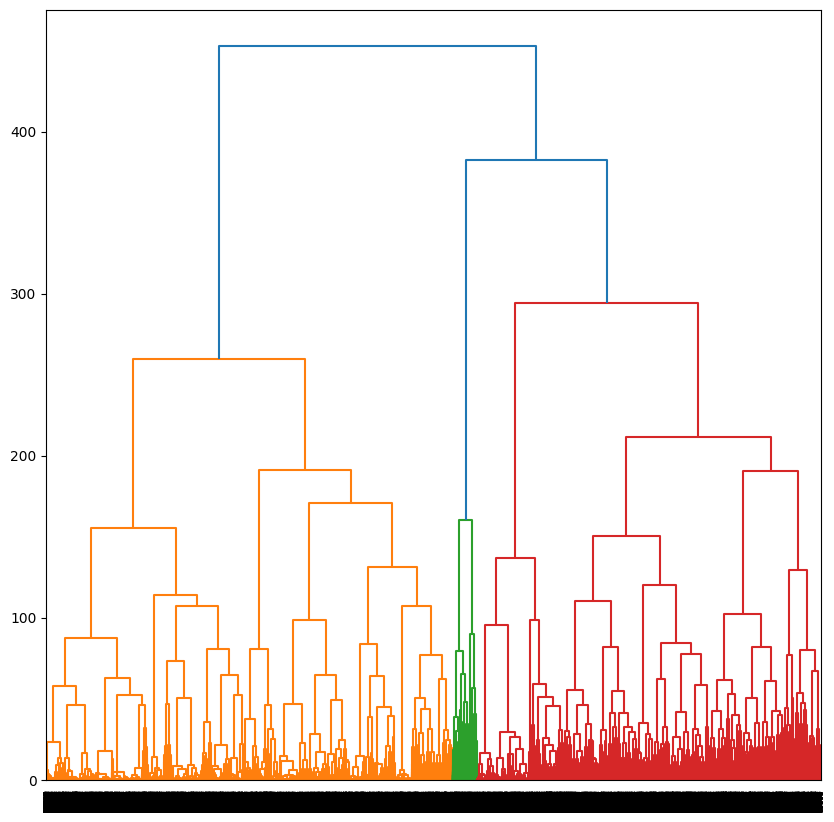

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# матрица расстояний
Z = linkage(X_std.iloc[:30000], 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)

In [12]:
df = df.drop("handOrientation4", axis=1)
df = df.drop("chestOrientation4", axis=1)
df = df.drop("ankleOrientation4", axis=1)

In [15]:
from sklearn.cluster import KMeans

# Создаем модель кластеризации
kmeans = KMeans(n_clusters=5)

# обучим нашу модель
kmeans.fit(X_std)
# kmeans.predict(X_new)

# выведем полученные метки кластеров, которые вычислил алгоритм
# Setosa - 0, Versicolour – 1 и Virginica – 2
Y_pred = kmeans.labels_
Y_pred

array([3, 2, 0, ..., 2, 2, 3], dtype=int32)

In [14]:
otv = pd.DataFrame()
otv["activityID"] = Y_pred
otv

,activityID
0,0
1,2
2,0
3,2
4,0
...,...
106542,2
106543,2
106544,2
106545,2


from matplotlib import pyplot as plt
otv['activityID'].plot(kind='hist', bins=20, title='activityID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
otv['activityID'].plot(kind='line', figsize=(8, 4), title='activityID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
for i in range(len(Y_pred)):
  if (otv["activityID"][i] == 0):
    otv["activityID"][i] = 1
    continue;
  if (otv["activityID"][i] == 1):
    otv["activityID"][i] = 2
    continue;
  if (otv["activityID"][i] == 2):
    otv["activityID"][i] = 3
    continue;
otv

<ipython-input-61-93a6454e0af3>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  otv["activityID"][i] = 1
<ipython-input-61-93a6454e0af3>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values t

,activityID
0,1
1,2
2,3
3,2
4,1
...,...
534596,2
534597,3
534598,3
534599,2


In [ ]:
otv.reset_index(drop=False, inplace=True)
otv.to_csv('output.csv', index=False)